In [ ]:
pip install nltk


In [ ]:
import nltk

# Download the stopwords dataset
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# For example, to download the punkt tokenizer
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [19]:
import pandas as pd
import matplotlib.pyplot as plt



In [ ]:
pip install matplotlib seaborn pandas


In [ ]:
%%capture
!pip install umap-learn


In [ ]:
%%capture
!pip install hdbscan


In [ ]:
%%capture
pip install matplotlib seaborn pandas


Data Preparation and Cleaning


In the "Data Preparation and Cleaning" section, we utilized df.info() to overview our dataset, examining entries, identifying non-null counts, and assessing column data types. In order to guide our cleaning process to ensure data integrity and readiness for subsequent analysis.

In [26]:
import pandas as pd

# Example: Loading a single CSV file
file_path = '/content/combined_data.csv'  # Replace 'your_data.csv' with the path to your CSV file
df = pd.read_csv(file_path)

# Assuming your column of interest is named 'utterances'; adjust if it has a different name
# df = df.drop_duplicates(subset='UTTERANCES')

# Basic cleaning: lowercasing and removing non-alphanumeric characters
df['cleaned_utterances'] = df['UTTERANCES'].str.lower().str.replace('[^a-z0-9\s]', '', regex=True)

# Note: Correcting obvious typos is more complex and may require specific rules or NLP tools


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26077 entries, 0 to 26076
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   UTTERANCES          26050 non-null  object 
 1   TRAITS              0 non-null      float64
 2   PROMPT TYPE         26074 non-null  object 
 3   TASK NAME           26074 non-null  object 
 4   NODE NAME           26074 non-null  object 
 5   USERID              26077 non-null  object 
 6   CHANNELUID          26077 non-null  object 
 7   LANGUAGE            26077 non-null  object 
 8   DATE & TIME         26077 non-null  object 
 9   CHANNEL             26077 non-null  object 
 10  AMBIGUOUS           26077 non-null  bool   
 11  AMBIGUOUS INTENTS   0 non-null      float64
 12  TRAINED             26077 non-null  bool   
 13  MESSAGEID           26077 non-null  object 
 14  USERTAGS            25902 non-null  object 
 15  SESSIONTAGS         26077 non-null  object 
 16  MESS

Dates of Coverage for Unhandled Utterances

Date range for Unhandled Utterances: November 1, 2023, 09:07 AM to January 23, 2024, 10:34 PM.

In [33]:
# Assuming 'df' is your DataFrame and 'DATE & TIME' is the column with datetime strings
df['timestamp'] = pd.to_datetime(df['DATE & TIME'], format='%m-%d-%Y (%I:%M %p)')  # Adjust the format as necessary

coverage_start = df['timestamp'].min()
coverage_end = df['timestamp'].max()

print(f"Coverage dates for unhandled utterances: {coverage_start} to {coverage_end}")


Coverage dates for unhandled utterances: 2023-11-01 09:07:00 to 2024-01-23 22:34:00


Velocity of Unhandled Utterances Over Time

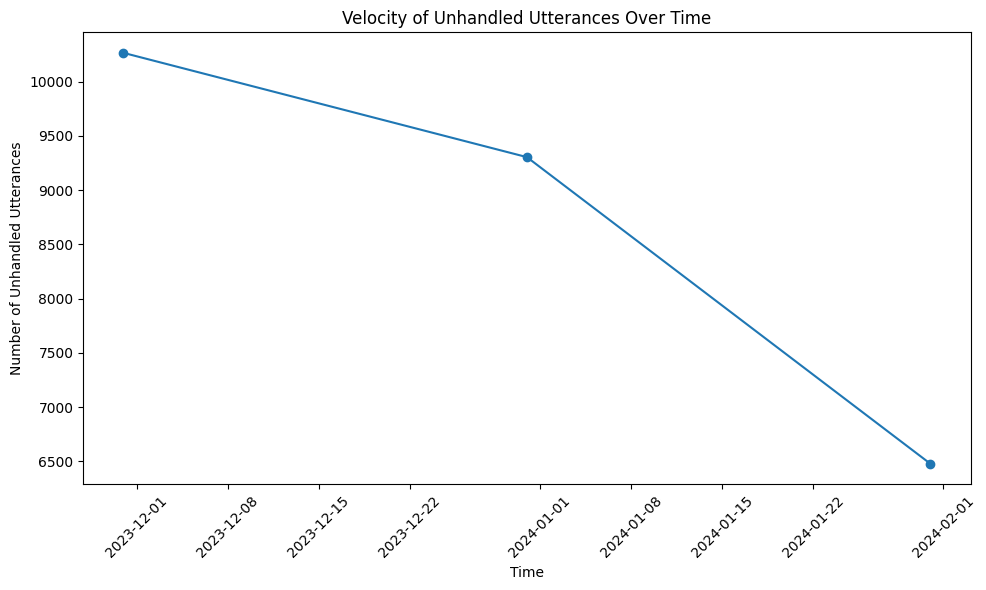

In [34]:
# Ensure 'DATE & TIME' is in datetime format
df['timestamp'] = pd.to_datetime(df['DATE & TIME'], format='%m-%d-%Y (%I:%M %p)')

# Set 'timestamp' as the index for resampling
df.set_index('timestamp', inplace=True)

# Resample to get counts per month
# Since 'UTTERANCES' column contains all unhandled utterances, we count any column after resampling,
# here we use 'UTTERANCES' itself for counting
monthly_counts = df['UTTERANCES'].resample('M').count()

# Plotting the monthly counts
plt.figure(figsize=(10, 6))
plt.plot(monthly_counts.index, monthly_counts, marker='o', linestyle='-')
plt.title('Velocity of Unhandled Utterances Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Unhandled Utterances')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Unhandled Utterances Per Month

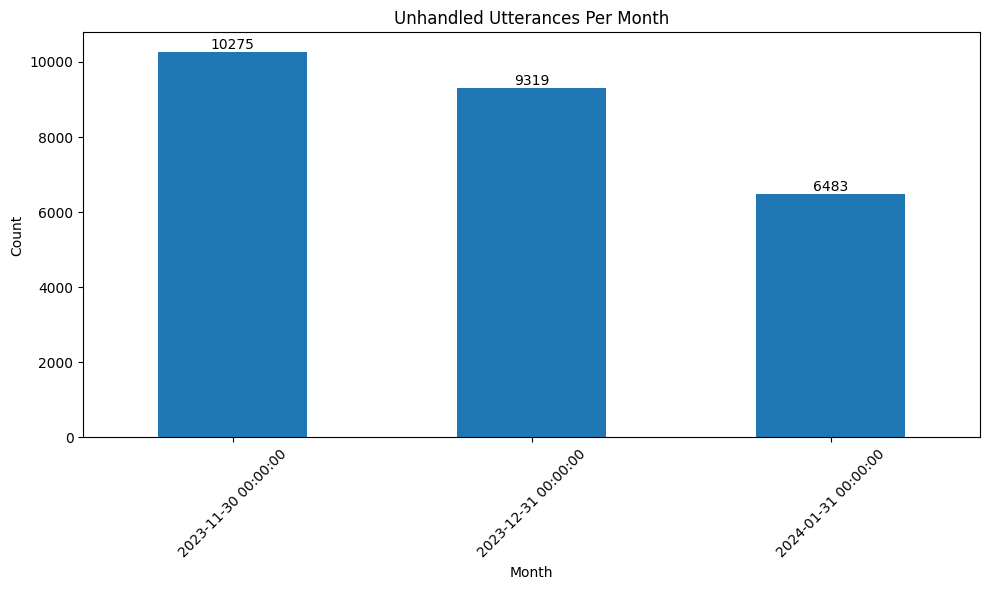

In [100]:
# Assuming 'df' already has a 'timestamp' column in datetime format
# If not, ensure 'DATE & TIME' is converted to datetime format
df['timestamp'] = pd.to_datetime(df['DATE & TIME'], format='%m-%d-%Y (%I:%M %p)')

# Set 'timestamp' as the index (if not already set)
df.set_index('timestamp', inplace=True)

# Aggregate counts by month using the index for grouping
monthly_counts = df.resample('M').size()

# Plotting
plt.figure(figsize=(10, 6))
bars = monthly_counts.plot(kind='bar')
plt.title('Unhandled Utterances Per Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

# Adding the totals on top of each bar
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.3, str(bar.get_height()),
             ha='center', va='bottom')

plt.show()


Unhandled Utterances Frequency

In [116]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Assuming utterance_counts is already defined
utterance_counts = df['UTTERANCES'].value_counts().reset_index()
utterance_counts.columns = ['Utterance', 'Frequency']

# Dropdown for all utterances
utterance_dropdown = widgets.Dropdown(
    options=[(f"{row['Utterance']} ({row['Frequency']})", row['Utterance']) for index, row in utterance_counts.iterrows()],
    description='Utterances:',
)

# Output widget for the dropdown
dropdown_output = widgets.Output()

def on_dropdown_change(change):
    with dropdown_output:
        clear_output()
        selected_utterance = change['new']
        frequency = utterance_counts[utterance_counts['Utterance'] == selected_utterance]['Frequency'].iloc[0]
        print(f"Selected Utterance: {selected_utterance}\nFrequency: {frequency}")

utterance_dropdown.observe(on_dropdown_change, names='value')

# Search bar and button for searching utterances
search_bar = widgets.Text(description='Search:', placeholder='Type here to search utterances...')
search_button = widgets.Button(description='Search')
search_output = widgets.Output()

def on_search_button_clicked(b):
    search_query = search_bar.value.lower()
    with search_output:
        clear_output()
        filtered_df = utterance_counts[utterance_counts['Utterance'].str.lower().str.contains(search_query)]
        if not filtered_df.empty:
            for index, row in filtered_df.iterrows():
                print(f"{row['Utterance']} ({row['Frequency']})")
        else:
            print("No matching utterances found.")

search_button.on_click(on_search_button_clicked)

# Layout for search functionality
search_layout = widgets.VBox([search_bar, search_button, search_output])

# Combine dropdown and search functionalities in a single layout
combined_layout = widgets.VBox([utterance_dropdown, dropdown_output, widgets.Label(value="Or search for an utterance:"), search_layout])

# Display the combined interface
display(combined_layout)


Top Unhandled Utterances Per Month

In [44]:
import pandas as pd
from itertools import zip_longest

# Assuming df is already prepared and contains 'month_year' and 'count' columns

# Function to print the data side by side
def print_side_by_side(*args, column_width=20):
    # Find the longest list to ensure equal length lists
    max_length = max(len(lst) for lst in args)

    # Use zip_longest to iterate over lists of unequal length
    for row in zip_longest(*args, fillvalue=''):
        print("".join(str(item).ljust(column_width) for item in row))

# Preparing data for display
data_for_display = []
for month_year, group in top_unhandled_per_month.groupby('month_year'):
    # Create a header for the month
    month_header = f"{month_year} - Top 50 Utterances"
    # Prepare utterances and their counts as strings
    utterances = [f"{row.UTTERANCES} ({row['count']})" for idx, row in group.iterrows()]
    # Combine the header and the utterances
    month_data = [month_header] + utterances
    data_for_display.append(month_data)

# Adjust column_width as necessary based on your console width and content length
print_side_by_side(*data_for_display, column_width=30)


2023-11 - Top 50 Utterances   2023-12 - Top 50 Utterances   2024-01 - Top 50 Utterances   
Okay (729)                    Okay (713)                    Okay (434)                    
No (562)                      Hello (568)                   Hello (407)                   
Hello (481)                   No (432)                      No (356)                      
Yeah (149)                    Yeah (138)                    Yeah (103)                    
Oh (144)                      Oh (119)                      Oh (70)                       
Hey (79)                      Hey (84)                      Three schedule (67)           
Right (76)                    Three schedule (74)           Appointment (59)              
Three schedule (73)           Right (60)                    Hey (52)                      
Appointment (68)              Appointment (59)              Right (35)                    
Service (63)                  I don't know (46)             Hi (30)                       

Top Unhandled Utterances by Task Name

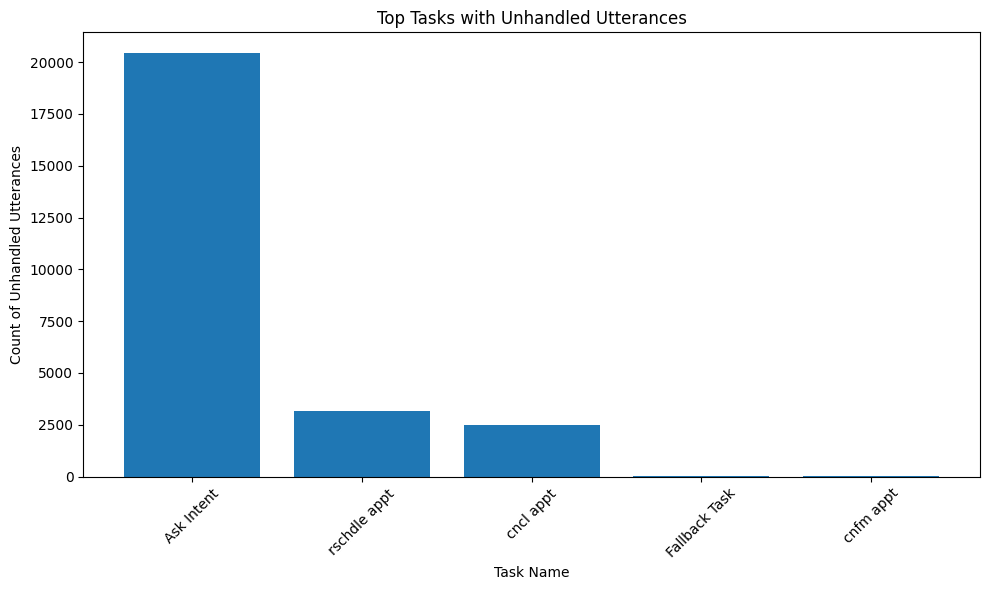

In [53]:

# Grouping unhandled utterances by task name and counting occurrences
top_tasks_unhandled = df.groupby('TASK NAME').size().reset_index(name='count')
top_tasks_unhandled = top_tasks_unhandled.sort_values('count', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(top_tasks_unhandled['TASK NAME'], top_tasks_unhandled['count'])
plt.title('Top Tasks with Unhandled Utterances')
plt.xlabel('Task Name')
plt.ylabel('Count of Unhandled Utterances')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Top Unhandled Utterances by Node Name

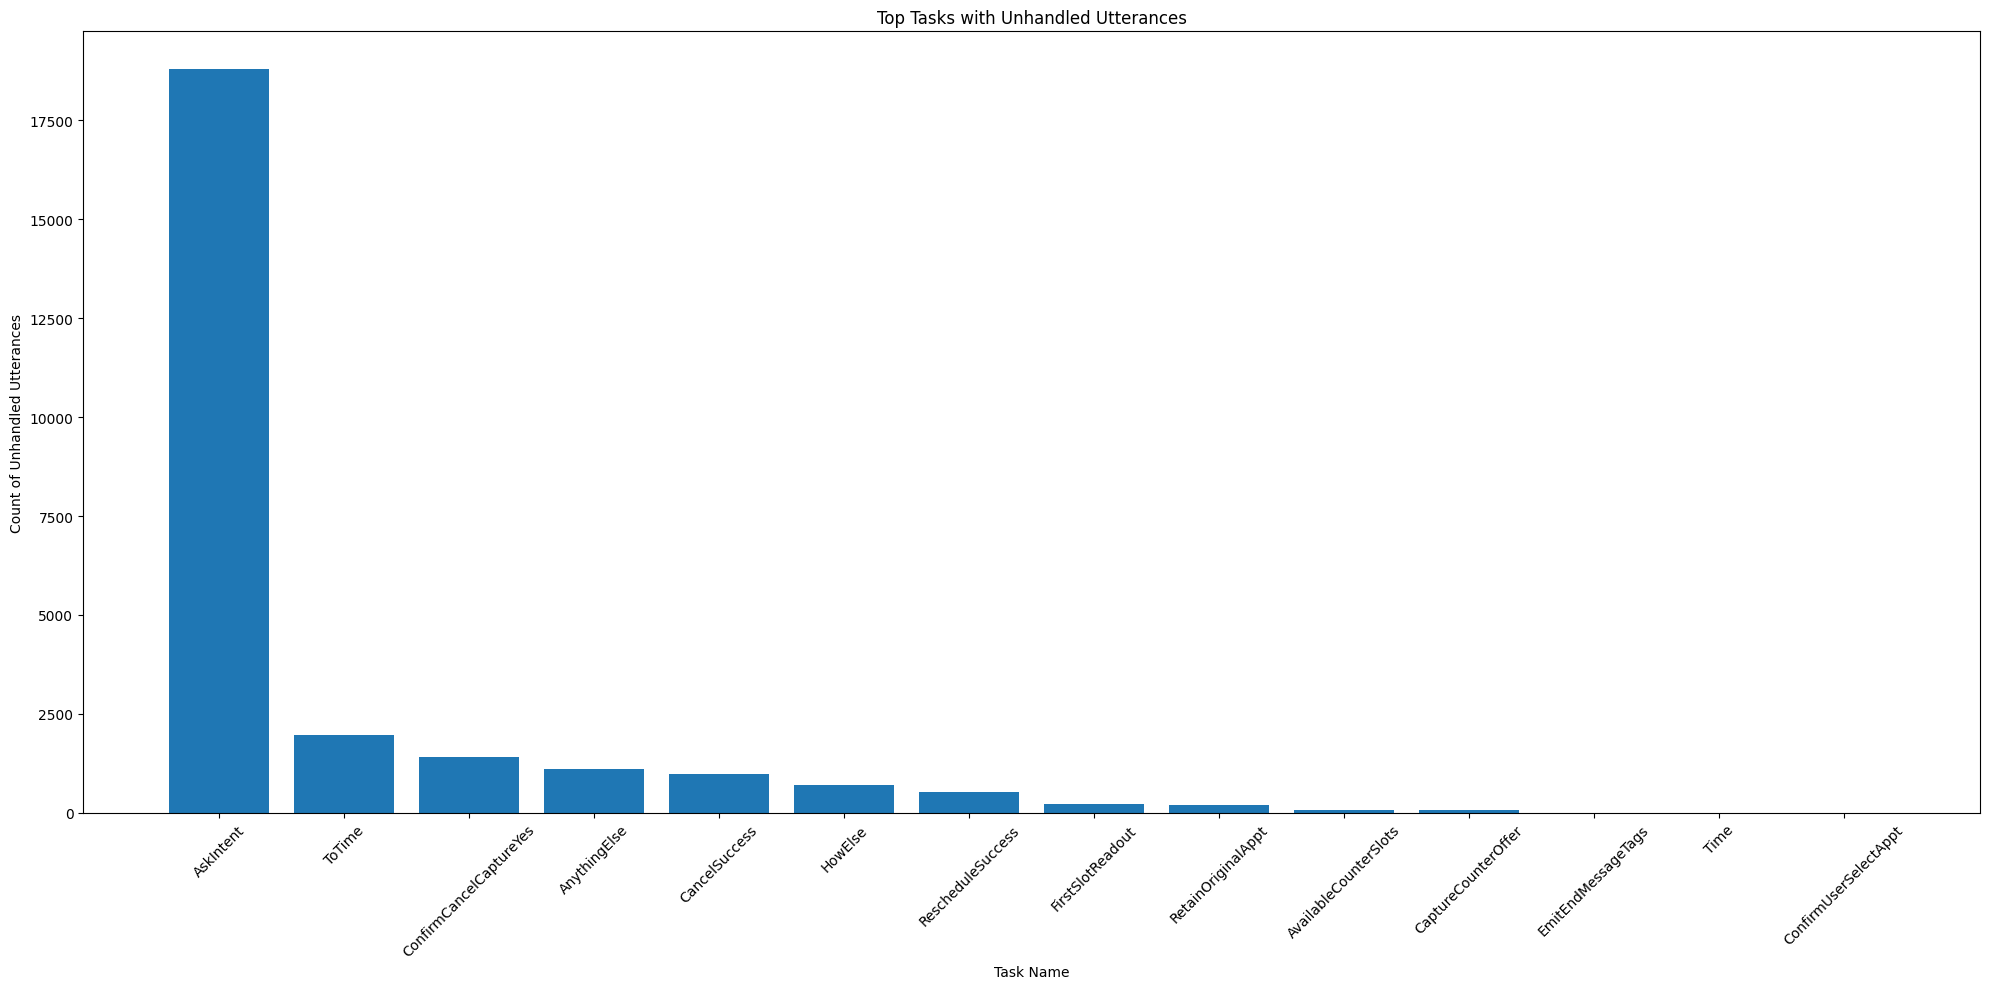

In [102]:

# Grouping unhandled utterances by task name and counting occurrences
top_tasks_unhandled = df.groupby('NODE NAME').size().reset_index(name='count')
top_tasks_unhandled = top_tasks_unhandled.sort_values('count', ascending=False)

# Plotting
plt.figure(figsize=(20, 10))
plt.bar(top_tasks_unhandled['NODE NAME'], top_tasks_unhandled['count'])
plt.title('Top Tasks with Unhandled Utterances')
plt.xlabel('Task Name')
plt.ylabel('Count of Unhandled Utterances')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [121]:
import ipywidgets as widgets
from IPython.display import display, clear_output


# Assuming 'df' has a 'DATE' column and it's not already in datetime format
df['DATE'] = pd.to_datetime(df['DATE & TIME'])
df['Month-Year'] = df['DATE'].dt.to_period('M')

# Now, proceed with grouping and aggregation
utterance_counts = df.groupby(['NODE NAME', 'Month-Year', 'UTTERANCES']).size().reset_index(name='Count')
top_utterances_per_node_month = utterance_counts.groupby(['NODE NAME', 'Month-Year']).apply(lambda x: x.sort_values('Count', ascending=False).head(30)).reset_index(drop=True)

# Assuming the creation of an interactive dropdown as previously described

# Create a dropdown to select a NODE NAME
node_name_dropdown = widgets.Dropdown(
    options=sorted(top_utterances_per_node_month['NODE NAME'].unique()),
    description='NODE NAME:',
    disabled=False,
)

# Output widget for displaying the selected NODE NAME's utterances and frequencies
output = widgets.Output()

def on_node_name_change(change):
    with output:
        clear_output()
        # Filter the DataFrame for the selected NODE NAME
        selected_node_name = change['new']
        filtered_df = top_utterances_per_node_month[top_utterances_per_node_month['NODE NAME'] == selected_node_name]

        # Display the utterances and their frequencies for the selected NODE NAME
        if not filtered_df.empty:
            display(filtered_df[['Month-Year', 'UTTERANCES', 'Count']])
        else:
            print("No data available for this NODE NAME.")

# Bind the change event of the dropdown to the function
node_name_dropdown.observe(on_node_name_change, names='value')

# Display the dropdown and output widgets
display(node_name_dropdown, output)


Dropdown(description='NODE NAME:', options=('AnythingElse', 'AskIntent', 'AvailableCounterSlots', 'CancelSucce…

Output()

Frequency of Task Name

In [62]:
import pandas as pd



# Ensure 'DATE & TIME' column is in datetime format
df['DATE & TIME'] = pd.to_datetime(df['DATE & TIME'], format='%m-%d-%Y (%I:%M %p)')

# Extract the month and year
df['month_year'] = df['DATE & TIME'].dt.to_period('M')

# Group by month, utterances, and task name and calculate frequencies
result_df = df.groupby(['month_year', 'UTTERANCES', 'TASK NAME']).size().reset_index(name='frequency')

# Pivot the data to create columns for each month
pivot_df = result_df.pivot_table(index=['UTTERANCES', 'TASK NAME'], columns='month_year', values='frequency', fill_value=0)

# Sort columns by month
columns_sorted = sorted(pivot_df.columns, key=lambda x: pd.to_datetime(x.strftime('%Y-%m')))

# Reorder the DataFrame columns
pivot_df = pivot_df[columns_sorted]

# Display the pivot table
print(pivot_df)


month_year                                 2023-11  2023-12  2024-01
UTTERANCES                     TASK NAME                            
's not working                 Ask Intent        1        0        0
's office target               Ask Intent        1        0        0
1 and 10                       Ask Intent        1        1        0
1 and 10 know when he's coming Ask Intent        0        1        0
1 and 10 train                 Ask Intent        0        1        0
...                                            ...      ...      ...
Zero two appointment           Ask Intent        0        0        1
Zomax optical                  Ask Intent        1        0        0
iPhone                         Ask Intent        1        0        0
iPhone is working this morning Ask Intent        1        0        0
iWatch                         Ask Intent        1        0        0

[12483 rows x 3 columns]


In [68]:
import pandas as pd
from itertools import zip_longest

# Assuming df is already prepared and contains 'month_year' and 'count' columns

# Function to print the data side by side
def print_side_by_side(*args, column_width=20):
    # Find the longest list to ensure equal length lists
    max_length = max(len(lst) for lst in args)

    # Use zip_longest to iterate over lists of unequal length
    for row in zip_longest(*args, fillvalue=''):
        print("".join(str(item).ljust(column_width) for item in row))

# Preparing data for display
data_for_display = []
for month_year, group in top_unhandled_per_month.groupby('month_year'):
    # Create a header for the month
    month_header = f"{month_year} - Top 50 Utterances"
    # Prepare utterances, their counts, and task names as strings
    utterances = []
    for idx, row in group.iterrows():
        frequency = row['count']
        task_name = result_df[(result_df['month_year'] == month_year) & (result_df['UTTERANCES'] == row['UTTERANCES'])]['TASK NAME'].values[0]
        if task_name:
            utterance = f"{row.UTTERANCES} ({frequency}) {task_name}"
        else:
            utterance = f"{row.UTTERANCES} ({frequency})"
        utterances.append(utterance)
    # Combine the header and the utterances
    month_data = [month_header] + utterances
    data_for_display.append(month_data)

# Adjust column_width as necessary based on your console width and content length
print_side_by_side(*data_for_display, column_width=50)


2023-11 - Top 50 Utterances                       2023-12 - Top 50 Utterances                       2024-01 - Top 50 Utterances                       
Okay (729) Ask Intent                             Okay (713) Ask Intent                             Okay (434) Ask Intent                             
No (562) Ask Intent                               Hello (568) Ask Intent                            Hello (407) Ask Intent                            
Hello (481) Ask Intent                            No (432) Ask Intent                               No (356) Ask Intent                               
Yeah (149) Ask Intent                             Yeah (138) Ask Intent                             Yeah (103) cncl appt                              
Oh (144) Ask Intent                               Oh (119) Ask Intent                               Oh (70) Ask Intent                                
Hey (79) Ask Intent                               Hey (84) Ask Intent                         

Top 25 Unhandled Utterances More Than 2 Words

In [73]:
import pandas as pd

# Assuming df is your DataFrame and it includes an 'UTTERANCES' column with unhandled utterances

# Finding top 25 unhandled utterances by frequency
top_25_unhandled = df['UTTERANCES'].value_counts().reset_index()
top_25_unhandled.columns = ['UTTERANCES', 'count']
top_25_unhandled = top_25_unhandled.head(25)

print(top_25_unhandled)


           UTTERANCES  count
0                Okay   1876
1               Hello   1456
2                  No   1350
3                Yeah    390
4                  Oh    333
5                 Hey    215
6      Three schedule    214
7         Appointment    186
8               Right    171
9             Service    135
10                  Q    124
11                 Hi    119
12       I don't know    114
13          You can't    107
14               Call    103
15  Speak to a person    100
16           Schedule     91
17          Thank you     91
18           Question     86
19              Today     84
20               What     83
21             Please     83
22             Thanks     80
23      Customer care     67
24          Main menu     65


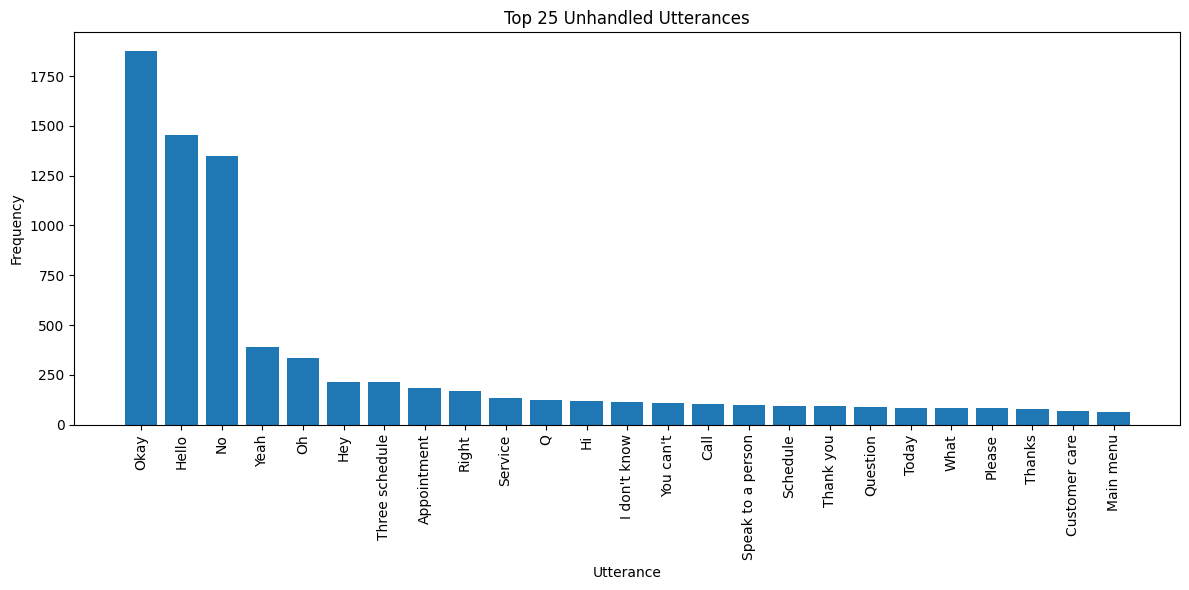

In [74]:
# Finding top 25 unhandled utterances by frequency
top_25_unhandled = df['UTTERANCES'].value_counts().reset_index()
top_25_unhandled.columns = ['UTTERANCES', 'count']
top_25_unhandled = top_25_unhandled.head(25)

# Create a bar chart to visualize the top 25 unhandled utterances
plt.figure(figsize=(12, 6))
plt.bar(top_25_unhandled['UTTERANCES'], top_25_unhandled['count'])
plt.title('Top 25 Unhandled Utterances')
plt.xlabel('Utterance')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [76]:
import pandas as pd
import plotly.express as px

# Assuming df is your DataFrame and it includes a 'month_year' column and an 'UTTERANCES' column

# Finding top 25 unhandled utterances per month
top_25_per_month = df.groupby(['month_year', 'UTTERANCES']).size().reset_index(name='count')
top_25_per_month = top_25_per_month.sort_values(['month_year', 'count'], ascending=[True, False])
top_25_per_month = top_25_per_month.groupby('month_year').head(25)

# Create an interactive bar chart
fig = px.bar(top_25_per_month, x='UTTERANCES', y='count', color='month_year',
             labels={'UTTERANCES': 'Utterance', 'count': 'Frequency'},
             title='Top 25 Utterances per Month')
fig.update_xaxes(type='category', categoryorder='total descending')
fig.update_layout(xaxis_title='Utterance', yaxis_title='Frequency', xaxis_tickangle=-45,
                  xaxis=dict(type='category'))
fig.show()


In [107]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets
from IPython.display import display

# Assuming df is your DataFrame and it includes a 'month_year' column
# Make sure the 'month_year' column is in the correct datetime format

# Count the frequency of each unhandled utterance per month
utterance_counts = df.groupby(['month_year', 'UTTERANCES']).size().reset_index(name='count')

# Create a list of unique months
months = df['month_year'].unique()

# Function to update and display the horizontal bar chart
def update_bar_chart(selected_month):
    selected_data = utterance_counts[utterance_counts['month_year'] == selected_month]
    top_25_utterances = selected_data.groupby('UTTERANCES')['count'].sum().nlargest(25)
    top_25_utterances = top_25_utterances.reset_index()  # Reset index to access 'UTTERANCES' column

    plt.figure(figsize=(10, 8))
    plt.barh(top_25_utterances['UTTERANCES'], top_25_utterances['count'])
    plt.title(f'Top 25 Unhandled Utterances in {selected_month}')
    plt.xlabel('Frequency')
    plt.ylabel('Utterance')
    plt.tight_layout()
    plt.show()

# Create a dropdown widget for selecting the month
month_dropdown = widgets.Dropdown(options=months, description='Select Month')

# Create an interactive display
interactive_plot = interact(update_bar_chart, selected_month=month_dropdown)
display(interactive_plot)


interactive(children=(Dropdown(description='Select Month', options=(Period('2023-12', 'M'), Period('2023-11', …

<function __main__.update_bar_chart(selected_month)>

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets
from IPython.display import display

# Assuming df is your DataFrame and it includes a 'month_year' column
# Make sure the 'month_year' column is in the correct datetime format

# Filter for utterances with at least 2 words
df['word_count'] = df['UTTERANCES'].apply(lambda x: len(str(x).split()))
two_or_more_words_df = df[df['word_count'] >= 2]

# Count the frequency of each unhandled utterance per month
utterance_counts = two_or_more_words_df.groupby(['month_year', 'UTTERANCES']).size().reset_index(name='count')

# Create a list of unique months
months = two_or_more_words_df['month_year'].unique()

# Function to update and display the horizontal bar chart
def update_bar_chart(selected_month):
    selected_data = utterance_counts[utterance_counts['month_year'] == selected_month]
    top_25_utterances = selected_data.groupby('UTTERANCES')['count'].sum().nlargest(25)
    top_25_utterances = top_25_utterances.reset_index()  # Reset index to access 'UTTERANCES' column

    plt.figure(figsize=(10, 8))
    plt.barh(top_25_utterances['UTTERANCES'], top_25_utterances['count'])
    plt.title(f'Top 25 2+ word Unhandled Utterances in {selected_month}')
    plt.xlabel('Frequency')
    plt.ylabel('Utterance')
    plt.tight_layout()
    plt.show()

# Create a dropdown widget for selecting the month
month_dropdown = widgets.Dropdown(options=months, description='Select Month')

# Create an interactive display
interactive_plot = interact(update_bar_chart, selected_month=month_dropdown)
display(interactive_plot)


interactive(children=(Dropdown(description='Select Month', options=(Period('2023-12', 'M'), Period('2023-11', …

<function __main__.update_bar_chart(selected_month)>

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets
from IPython.display import display

# Assuming df is your DataFrame and it includes a 'month_year' column
# Make sure the 'month_year' column is in the correct datetime format

# Filter for utterances with at least 2 words
df['word_count'] = df['UTTERANCES'].apply(lambda x: len(str(x).split()))
two_or_more_words_df = df[df['word_count'] >= 2]

# Count the frequency of each unhandled utterance per month
utterance_counts = two_or_more_words_df.groupby(['month_year', 'UTTERANCES']).size().reset_index(name='count')

# Create a list of unique months
months = two_or_more_words_df['month_year'].unique()

# Function to update and display the horizontal bar chart
def update_bar_chart(selected_month, word_count_range):
    selected_data = utterance_counts[utterance_counts['month_year'] == selected_month]

    # Filter by word count range
    filtered_data = selected_data[selected_data['UTTERANCES'].str.split().apply(len).between(word_count_range[0], word_count_range[1])]

    top_25_utterances = filtered_data.groupby('UTTERANCES')['count'].sum().nlargest(25)
    top_25_utterances = top_25_utterances.reset_index()  # Reset index to access 'UTTERANCES' column

    plt.figure(figsize=(10, 8))
    plt.barh(top_25_utterances['UTTERANCES'], top_25_utterances['count'])
    plt.title(f'Top 25 Unhandled Utterances in {selected_month}')
    plt.xlabel('Frequency')
    plt.ylabel('Utterance')
    plt.tight_layout()
    plt.show()

# Create a dropdown widget for selecting the month
month_dropdown = widgets.Dropdown(options=months, description='Select Month')

# Create a slider widget for selecting word count range
word_count_slider = widgets.IntRangeSlider(value=[1, 9], min=1, max=9, step=1, description='Word Count Range')

# Create an interactive display
interactive_plot = interact(update_bar_chart, selected_month=month_dropdown, word_count_range=word_count_slider)
display(interactive_plot)


interactive(children=(Dropdown(description='Select Month', options=(Period('2023-12', 'M'), Period('2023-11', …

<function __main__.update_bar_chart(selected_month, word_count_range)>

Clustering to Find Problem Areas with Cosine Similarity

interactive(children=(Dropdown(description='Select Month', options=(Period('2023-12', 'M'), Period('2023-11', …

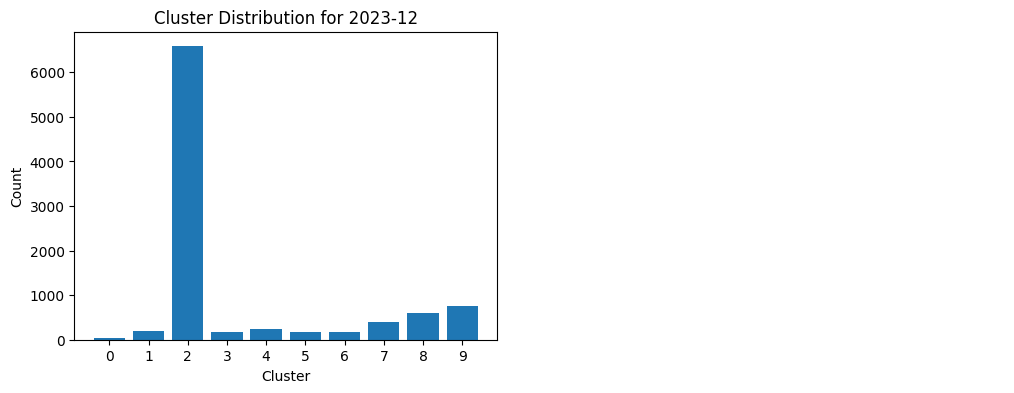

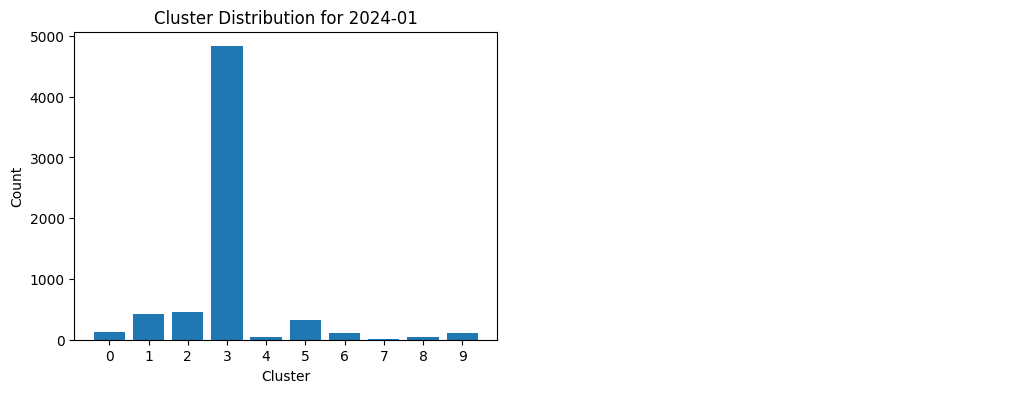

In [111]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import plotly.express as px


# Preprocessing text: tokenization and removing stop words
stop_words = stopwords.words('english')
vectorizer = TfidfVectorizer(stop_words=stop_words)

# Function to perform clustering for a given month
def cluster_and_visualize(selected_month):
    # Filter data for the selected month
    month_data = df[df['month_year'] == selected_month]

    # Vectorize the utterances
    X = vectorizer.fit_transform(month_data['UTTERANCES'])

    # Perform clustering (e.g., K-means)
    num_clusters = 10  # You can adjust the number of clusters
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_

    # Create a bar chart to visualize the clusters distribution
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    cluster_counts = np.bincount(cluster_labels)
    plt.bar(range(num_clusters), cluster_counts)
    plt.xlabel('Cluster')
    plt.ylabel('Count')
    plt.title(f'Cluster Distribution for {selected_month}')
    plt.xticks(range(num_clusters))

    # Create a DataFrame to store cluster labels and utterances
    cluster_df = pd.DataFrame({'Cluster': cluster_labels, 'Utterance': month_data['UTTERANCES']})

    # Display a preview of 10 utterances for each cluster
    cluster_utterance_previews = []
    for i in range(num_clusters):
        cluster_i_data = cluster_df[cluster_df['Cluster'] == i]
        preview_utterances = cluster_i_data.head(30)['Utterance'].tolist()
        cluster_utterance_previews.append(preview_utterances)

    # Display the interactive Plotly scatter plot
    fig = px.scatter(cluster_df, x='Cluster', text='Utterance', title=f'Clustered Utterances for {selected_month}')
    fig.update_traces(textposition='top center')

    # Display the bar chart
    plt.subplot(1, 2, 2)
    plt.axis('off')  # Hide the second subplot since we're using Plotly for interactive visualization

    # Display the interactive Plotly scatter plot
    fig.show()

    # Create a dropdown widget to select the cluster
    cluster_dropdown = widgets.Dropdown(options=range(num_clusters), description='Select Cluster')

    # Function to display full utterance list for the selected cluster
    def show_full_cluster(selected_cluster):
        print(f'Cluster {selected_cluster}:')
        for utterance in cluster_utterance_previews[selected_cluster]:
            print(f' - {utterance}')

    # Create an interactive display for selecting clusters
    cluster_display = widgets.interactive(show_full_cluster, selected_cluster=cluster_dropdown)
    display(cluster_display)

# Create a dropdown widget to select the month
months = df['month_year'].unique()
month_dropdown = widgets.Dropdown(options=months, description='Select Month')

# Create an interactive display
interactive_plot = widgets.interactive(cluster_and_visualize, selected_month=month_dropdown)
display(interactive_plot)
